AutoEncoder
=====

### Autoencoing은 데이터 압축 알고리즘으로 압축 함수와 압축해제 함수가 있다.

1) ***data-specific하다.***   
같은 범주에 해당하는 데이터만을 학습시켜줘야 한다. 고양이 이미지를 복원하고 싶으면 고양이 사진만 학습시켜야 한다. 강아지 사진 추가X. 범주마다 고유의 특징을 추출해내기 때문이다.   

2) ***손실이 있다.***  
즉 압축 해제된 결과물은 원본 보다 좋지 않다.   

3) ***예제 데이터로부터 자동적으로 학습한다.***   
예를 들어 고양이 사진에서 귀, 눈, 입 등 각각의 부위에 대한 학습을 필요로 하지 않는다. 


Autoencoder : single hidden layer
-----

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# encoding dim은 축소된 represnetation vector의 크기임
# sigmoid를 사용하는 이유 : scale 된 값이 필요하기 때문에.
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [3]:
# Encoder의 구조
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Decoder의 구조
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [5]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

# Load Data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() # target 값을 받아오지 않음



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
11493376/11490434 [==============================] - 1s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# (60000, 28, 28) -> (60000, 784)로 바꿔줌
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train, # train, test 파트 모두 x_train이 들어감
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.3635 - val_loss: 0.2716
Epoch 2/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2648 - val_loss: 0.2544
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2429 - val_loss: 0.2295
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2212 - val_loss: 0.2113
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2062 - val_loss: 0.1988
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1954 - val_loss: 0.1893
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1867 - val_loss: 0.1813
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1794 - val_loss: 0.1747
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1733 - val_loss: 0.1692
Epoc

In [0]:
decoded_imgs = autoencoder.predict(x_test)

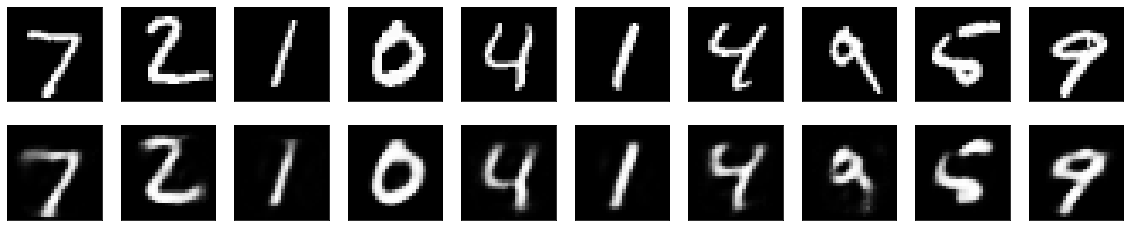

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Autoencoder : Deep Autoencoder
----

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# (60000, 28, 28) -> (60000, 784)로 바꿔줌
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.3048 - val_loss: 0.0044
Epoch 2/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 4/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.0040 - val_loss: 0.0041
Epoch 5/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.0040 - val_loss: 0.0040
Epoch 9/100
60000/60000 [==============================] - 2s 34us/step - lo

Convolutional Autoencoder
----

***Upsampling(사이를 평균값으로 채움)***  


|Before||    
----|----
| 3 | 5 | 
| 4 | 8 | 


|After| ||  
--|--|--
3|4|5  
3.5|  5  | 6.5  
4   | 6   | 8    

In [31]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() # target 값을 받아오지 않음

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 28,28,1))
x_test = x_test.reshape((len(x_test), 28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [32]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
# shape : (None, 28, 28, 16)


x = MaxPooling2D((2,2), padding='same')(x)
# shape : (None, 14, 14, 16)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
# shape : (None, 14, 14, 8)

x = MaxPooling2D((2,2), padding='same')(x)
# shape : (None, 7, 7, 8)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
# shape : (None, 7, 7, 8)

encoded = MaxPooling2D((2,2), padding='same')(x)
# shape : (None, 4, 4, 8)
# padding = same => 홀수로 떨어지는 것을 방지하기 위해 padding을 추가해줌
# dimension을 맞춰주기 위해!!
# padding을 추가하지 않으면 7 -> 3으로 filter 수가 바뀜
# decode할 때 3 -> 6 -> 12..... 이런식으로 올라가서 원래대로 복원할 수 없음

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
# None, 4, 4, 8

x = UpSampling2D((2,2))(x)
# None 8, 8, 8

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
# None 8, 8, 8

x = UpSampling2D((2,2))(x)
# None 16, 16, 8

x = Conv2D(16, (3,3), activation='relu')(x)
# None, 14, 14, 16
# padding이 없어서 14!!!

x = UpSampling2D((2,2))(x)
# None, 28, 28, 16

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
# None, 28, 28, 1
# feature map이 한 장 나와야 하기 때문에...
# color image였다면 output filter의 수가 3장 나와야함!!
# 이전 layer에서 같은 사이즈를 출력하기 위해 padding을 추가해줌!

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
               epochs=100,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2517 - val_loss: 0.1937
Epoch 2/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1776 - val_loss: 0.1669
Epoch 3/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1613 - val_loss: 0.1635
Epoch 4/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1494 - val_loss: 0.1438
Epoch 5/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1411 - val_loss: 0.1386
Epoch 6/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1356 - val_loss: 0.1325
Epoch 7/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1316 - val_loss: 0.1306
Epoch 8/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1284 - val_loss: 0.1254
Epoch 9/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.1262 - val_loss: 0.1

In [26]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0   

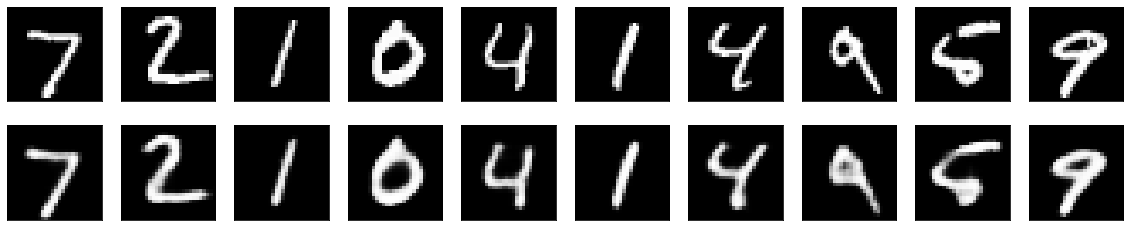

In [34]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Variational Autoencoded
----

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() # target 값을 받아오지 않음

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 28,28,1))
x_test = x_test.reshape((len(x_test), 28,28,1))

noise_factor = 0.5  # 노이즈 정도를 정함
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 노이즈가 더해진 값을 clip해줌
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [36]:
autoencoder.fit(x_train, x_train_noisy,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.5595 - val_loss: 0.5513
Epoch 2/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.5444 - val_loss: 0.5411
Epoch 3/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.5379 - val_loss: 0.5349
Epoch 4/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.5342 - val_loss: 0.5325
Epoch 5/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.5321 - val_loss: 0.5317
Epoch 6/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.5306 - val_loss: 0.5296
Epoch 7/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.5296 - val_loss: 0.5291
Epoch 8/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.5287 - val_loss: 0.5278
Epoch 9/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.5279 - val_loss: 0.5

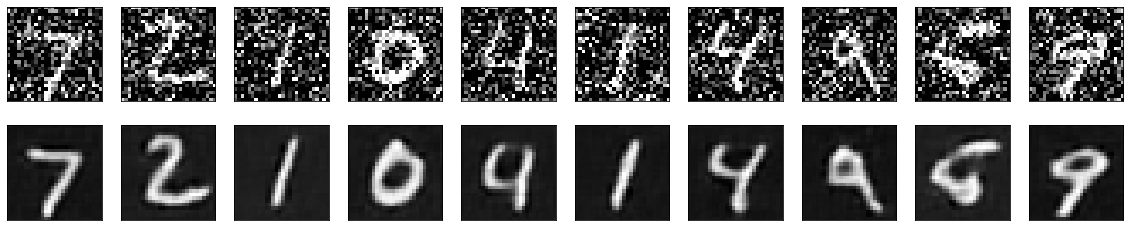

In [39]:
decoded_imgs = autoencoder.predict(x_test)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()